# DAT 490: Capstone: Exploratory Data Analysis

## Research Question 2

**Author:** Kunj Patel

**Date:** September 21, 2024

---

## Introduction

This capstone project examines how economic recessions affect U.S. financial markets and crime rates. It focuses on three significant periods: the DotCom Bubble (2000), the 2008-2009 Financial Crisis, and the COVID-19 pandemic. Our study analyzes and models the impact of crises on GDP, stock market activity, and crime rates in the US. Understanding these links can help policymakers, economists, and criminologists prepare for future crises and their social implications.



## Initial Data Setup and Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


### Data Loading

In [2]:
# Financial Data

sp500 = pd.read_csv('../DAT490/Datasets/sp500_data.csv')
interest_rates = pd.read_csv('../DAT490/Datasets/interest_rates.csv')
inflation_rates = pd.read_csv('../DAT490/Datasets/inflation_rates.csv')
gdp_growth_rates = pd.read_csv('../DAT490/Datasets/gdp_growth_rates.csv')
employment_rates = pd.read_csv('../DAT490/Datasets/employment_data.csv')
consumer_sentiment = pd.read_csv('../DAT490/Datasets/consumer_sentiment.csv')
vix = pd.read_csv('../DAT490/Datasets/vix_data.csv')

In [3]:
sp500['Date'] = pd.to_datetime(sp500['Date'])

interest_rates['DATE'] = pd.to_datetime(interest_rates['DATE'])

inflation_rates['DATE'] = pd.to_datetime(inflation_rates['DATE'])

gdp_growth_rates['DATE'] = pd.to_datetime(gdp_growth_rates['DATE'])

employment_rates['DATE'] = pd.to_datetime(employment_rates['DATE'])

consumer_sentiment['DATE'] = pd.to_datetime(consumer_sentiment['DATE'])

vix['Date'] = pd.to_datetime(vix['Date'])

In [4]:
chicago_crimes = pd.read_csv("/home/dark/Fall-24/DAT-490/Research_Question_2/all_chicago_data.csv")

/tmp/ipykernel_88352/2429952176.py:1: DtypeWarning: Columns (3,5,6,7,8,9,10,11,16,18,20,21,23,25,28,32,33,35,36,38,40,41,42,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_crimes = pd.read_csv("/home/dark/Fall-24/DAT-490/Research_Question_2/all_chicago_data.csv")


## Research Question 2: EDA

How have economic recessions influenced crime rates across the United States, and what patterns of change occurred during and after these periods?

In [5]:
chicago_crimes.dropna(subset=['Date'], inplace=True)

crimes_by_year = chicago_crimes.groupby(['Year', 'Primary Type']).size().reset_index(name='Crime Count')

print(crimes_by_year.head())

   Year         Primary Type  Crime Count
0  2001                ARSON         1177
1  2001              ASSAULT        36439
2  2001              BATTERY       108601
3  2001             BURGLARY        30218
4  2001  CRIM SEXUAL ASSAULT         2131


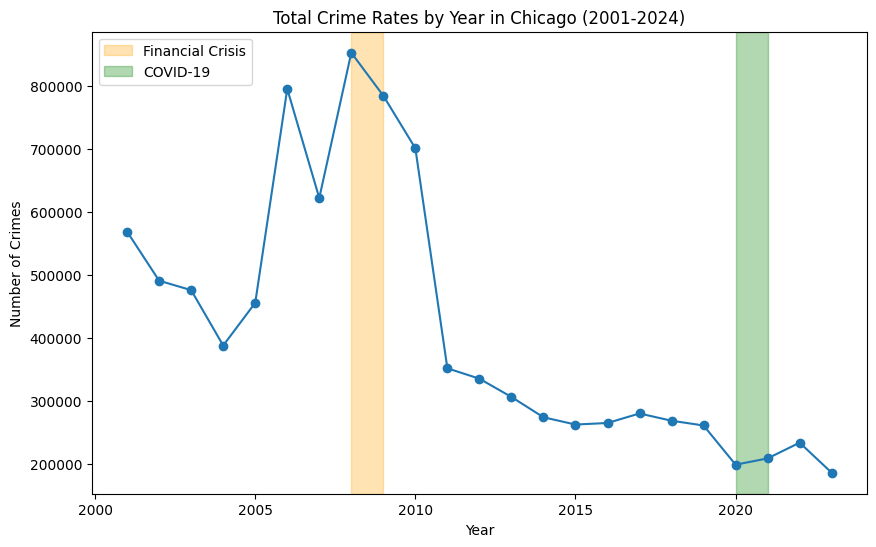

In [6]:
total_crimes_by_year = chicago_crimes.groupby('Year').size()

plt.figure(figsize=(10, 6))
plt.plot(total_crimes_by_year.index, total_crimes_by_year.values, marker='o')
plt.axvspan(2008, 2009, color='orange', alpha=0.3, label='Financial Crisis')
plt.axvspan(2020, 2021, color='green', alpha=0.3, label='COVID-19')
plt.title('Total Crime Rates by Year in Chicago (2001-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(False)
plt.show()


In [7]:
sp500.rename(columns={'Date': 'DATE'}, inplace=True)
vix.rename(columns={'Date': 'DATE'}, inplace=True)

merged_data = sp500.merge(interest_rates, on='DATE', how='inner')\
                   .merge(inflation_rates, on='DATE', how='inner')\
                   .merge(gdp_growth_rates, on='DATE', how='inner')\
                   .merge(employment_rates, on='DATE', how='inner')\
                   .merge(consumer_sentiment, on='DATE', how='inner')\
                   .merge(vix, on='DATE', how='inner')

Text(0, 0.5, 'Unemployment Rate')

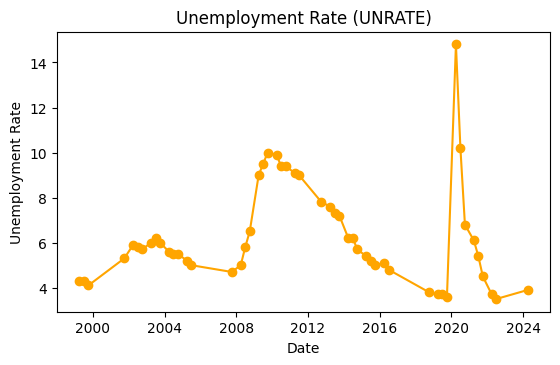

In [9]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.plot(merged_data['DATE'], merged_data['UNRATE'], marker='o', color='orange')
plt.title('Unemployment Rate (UNRATE)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')


Text(0, 0.5, 'GDP')

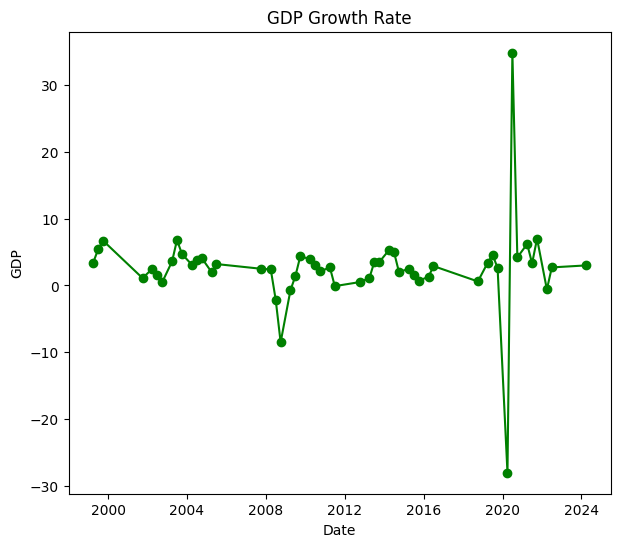

In [10]:
plt.figure(figsize=(7, 6))
plt.plot(merged_data['DATE'], merged_data['A191RL1Q225SBEA'], marker='o', color='green')
plt.title('GDP Growth Rate')
plt.xlabel('Date')
plt.ylabel('GDP')


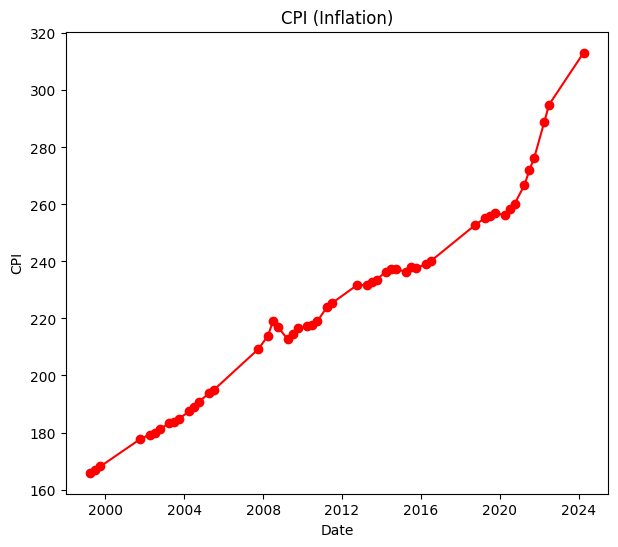

In [11]:
plt.figure(figsize=(7, 6))
plt.plot(merged_data['DATE'], merged_data['CPIAUCSL'], marker='o', color='red')
plt.title('CPI (Inflation)')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()